# Importing and loading in

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Have gene name be the index col to make part 1 easier

In [3]:
df_fpkms = pd.read_csv("~/qbb2021/data/fpkms.csv", index_col = "gene_name")
df_fpkms

,t_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
gene_name,,,,,,,,,,,,,,,,,
CR41571,FBtr0114258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CG45784,FBtr0346770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CR12798,FBtr0302440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CR40182,FBtr0302347,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
CG45783,FBtr0346769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CR40502,FBtr0114187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CR40719,FBtr0304147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CR40679,FBtr0114216,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591


# Step 1: MA plot w/ highlighted genes

Get columns for 2 samples

In [5]:
df_samples = df_fpkms.loc[:,["female_10","female_14D"]]
df_samples

,female_10,female_14D
gene_name,,
CR41571,0.000000,0.00000
CG45784,0.000000,0.00000
CR12798,0.000000,0.00000
CR40182,21.894249,17.20257
CG45783,0.000000,0.00000
...,...,...
CR40502,0.000000,0.00000
CR40719,0.000000,0.00000
CR40679,13.475658,1.98591


Get columns for two samples, with only rows corresponding to the genes to be highlighted

In [18]:
df_sisA = df_fpkms.loc["sisA",["female_10", "female_14D"]]
df_sisB = df_fpkms.loc["sc",["female_10", "female_14D"]]
df_run = df_fpkms.loc["run",["female_10", "female_14D"]]
df_Sxl = df_fpkms.loc["Sxl",["female_10", "female_14D"]]
df_msl2 = df_fpkms.loc["msl-2",["female_10", "female_14D"]]

df_sisA
df_sisB

female_10     1.25482
female_14D    3.10577
Name: sc, dtype: object

Calculate A and M values for all datasets

In [20]:
A = 0.5 * np.log2((df_samples.loc[:,"female_14D"]+1)*(df_samples.loc[:,"female_10"]+1))
M = np.log2((df_samples.loc[:,"female_14D"]+1)/(df_samples.loc[:,"female_10"]+1))

AsisA = 0.5 * np.log2((df_sisA.loc["female_14D"]+1)*(df_sisA.loc["female_10"]+1))
MsisA = np.log2((df_sisA.loc["female_14D"]+1)/(df_sisA.loc["female_10"]+1))

AsisB = 0.5 * np.log2((df_sisB.loc["female_14D"]+1)*(df_sisB.loc["female_10"]+1))
MsisB = np.log2((df_sisB.loc["female_14D"]+1)/(df_sisB.loc["female_10"]+1))

Arun = 0.5 * np.log2((df_run.loc[:,"female_14D"]+1)*(df_run.loc[:,"female_10"]+1))
Mrun = np.log2((df_run.loc[:,"female_14D"]+1)/(df_run.loc[:,"female_10"]+1))

ASxl = 0.5 * np.log2((df_Sxl.loc[:,"female_14D"]+1)*(df_Sxl.loc[:,"female_10"]+1))
MSxl = np.log2((df_Sxl.loc[:,"female_14D"]+1)/(df_Sxl.loc[:,"female_10"]+1))

Amsl2 = 0.5 * np.log2((df_msl2.loc[:,"female_14D"]+1)*(df_msl2.loc[:,"female_10"]+1))
Mmsl2 = np.log2((df_msl2.loc[:,"female_14D"]+1)/(df_msl2.loc[:,"female_10"]+1))

Plot scatter plot of both data sets, plot highlighted genes over the general MA plot so they stand out

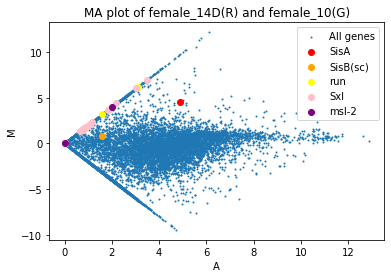

In [23]:
fig, ax = plt.subplots()
ax.scatter(A, M, s=1, label="All genes")

ax.scatter(AsisA, MsisA, color="red", label="SisA")
ax.scatter(AsisB, MsisB, color="orange", label="SisB(sc)")
ax.scatter(Arun, Mrun, color="yellow", label="run")
ax.scatter(ASxl, MSxl, color="pink", label="Sxl")
ax.scatter(Amsl2, Mmsl2, color="purple", label="msl-2")

ax.set_title("MA plot of female_14D(R) and female_10(G)")
ax.set_xlabel("A")
ax.set_ylabel("M")
ax.legend()

plt.show()

# Step 2: Generalize MA plot code

Define a function repeating all the steps used to generate the first MA plot, except replace sample names with arguments for the function so any samples can be used, also include an argument for specifying the file

In [27]:
def MA_plot(filename, sample1, sample2):
    #open filename and convert to pandas dataframe
    df_fpkms = pd.read_csv(filename)
    
    #take sample1 and sample2 columns from dataframe
    df_samples = df_fpkms.loc[:,[sample1, sample2]]
    
    #calculate A and M 
    A = 0.5 * np.log2((df_samples.loc[:,sample1]+1)*(df_samples.loc[:,sample2]+1))
    M = np.log2((df_samples.loc[:,sample1]+1)/(df_samples.loc[:,sample2]+1))
    
    #plot the figure
    fig, ax = plt.subplots()
    ax.scatter(A, M, s=1)
    
    ax.set_title("MA plot of {} and {}".format(sample1, sample2))
    ax.set_xlabel("A")
    ax.set_ylabel("M")
    
    plt.show()

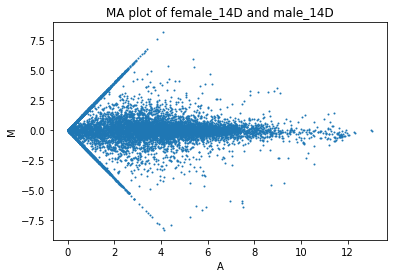

In [29]:
MA_plot("~/qbb2021/data/fpkms.csv", "female_14D", "male_14D")

# Step 3: Recreate Figure 3